In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
sns.set_style("whitegrid")

def plot_ts(result, id_pol, stype = 1):

    fig = plt.figure(figsize=(10,4))
    ax = plt.axes()

    row = result[np.logical_and.reduce([
        result['type'] == stype, result['id_pol'] == id_pol
    ])].iloc[0]

    ts = row[col_dts].to_numpy().flatten()

    _X = np.array(range(0, len(dates))) / len(dates)
    ols = row['intercept_m'] + _X * row['trend_m']
    low = (row['intercept_m'] - row['intercept_sd']*3) + _X * (row['trend_m'] - row['trend_sd']*3)
    upp = (row['intercept_m'] + row['intercept_sd']*3) + _X * (row['trend_m'] + row['trend_sd']*3)

    ax.plot(dates, ts,'tab:green', label='Time-series ')
    ax.plot(dates, ols,'tab:blue', label='Regression line')
    ax.fill_between(dates, low, upp, color='tab:blue', alpha=0.2)
    ax.set(xlabel='Date', ylabel='NDVI')
    ax.set_title(f'id={id_pol} (type-{stype:.0f})\n r2={row["r2"]:.3f}, interc.={row["intercept_m"]:.6f}, trend={row["trend_m"]:.6f}')
    ax.legend(loc='lower left');
    
def hist(result, col):
    fig, axes = plt.subplots(3, 1, figsize=(8,10),constrained_layout=True)#, sharex=True)

    args = [(1,'red'), (2,'green'), (3,'blue') ]

    for ((stype, color), ax) in zip(args, axes):
        values = result[result['type'] == stype][col]
        desc = values.describe()
        title = f'Distribution of {col} (type-{stype}) \n mean={desc["mean"]:.4f}, std={desc["std"]:.4f}, p25={desc["25%"]:.4f}, p50={desc["50%"]:.4f}, p75={desc["75%"]:.4f}'
        result[result['type'] == stype][col].plot(kind='hist', bins=128, logy=True, ax=ax, color=color, title=title)
    fig.show()

In [3]:
result = pd.read_parquet('./TNC_Restauration_S2_NDVI_Monitoring_main_trend_analysis.pq')

col_dts = [c for c in result.columns if c.startswith("d_")]
dates = [ datetime.strptime(c.split('_')[1], '%Y-%m-%d') for c in col_dts ]

result['trend_signif'] = result['trend_pv'].apply(lambda pv: (pv < 0.05))

In [6]:
result.shape

(266868, 368)

## Histogram

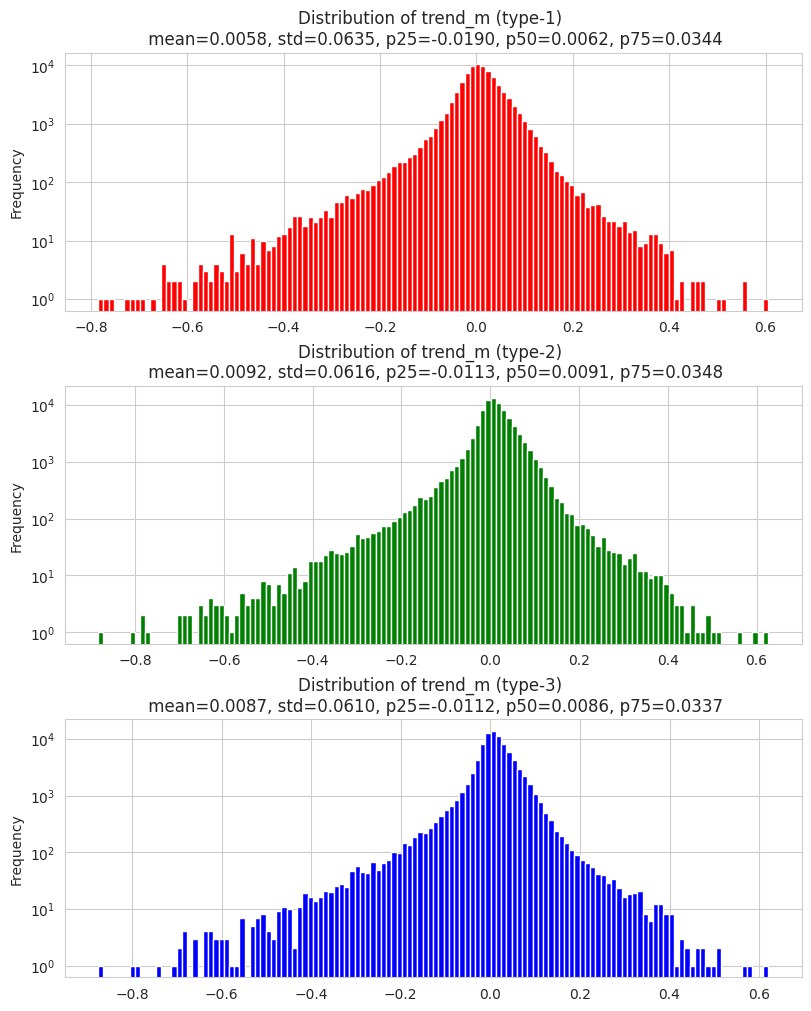

In [3]:
hist(result, 'trend_m')

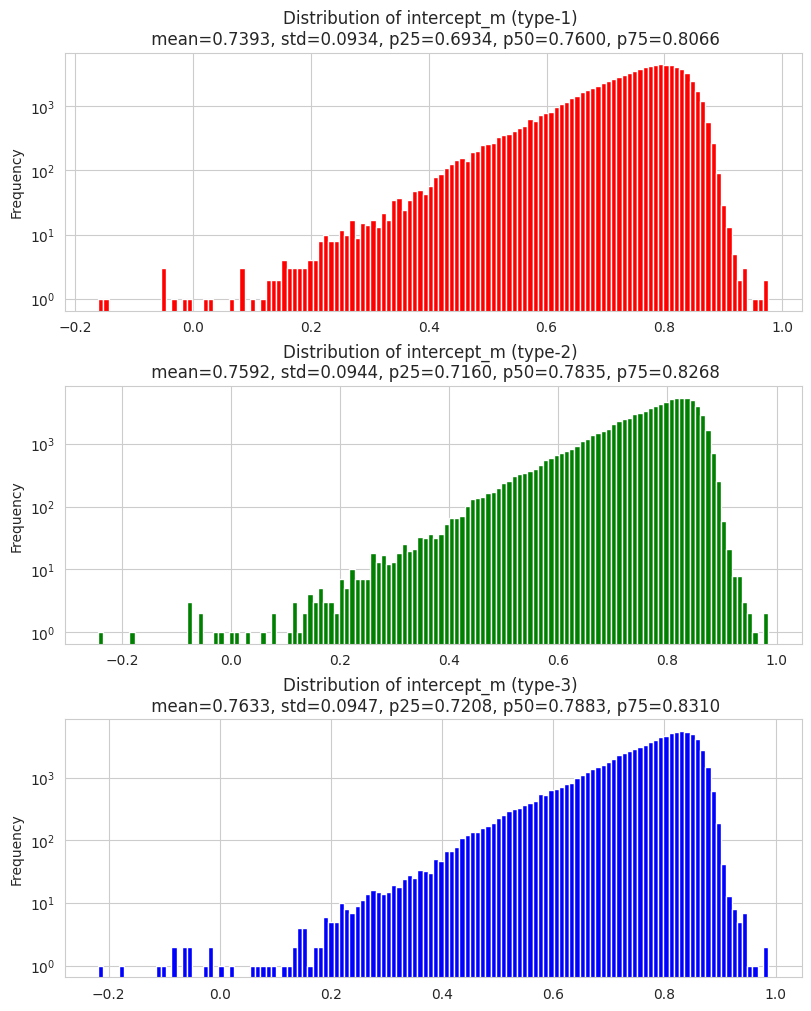

In [4]:
hist(result, 'intercept_m')

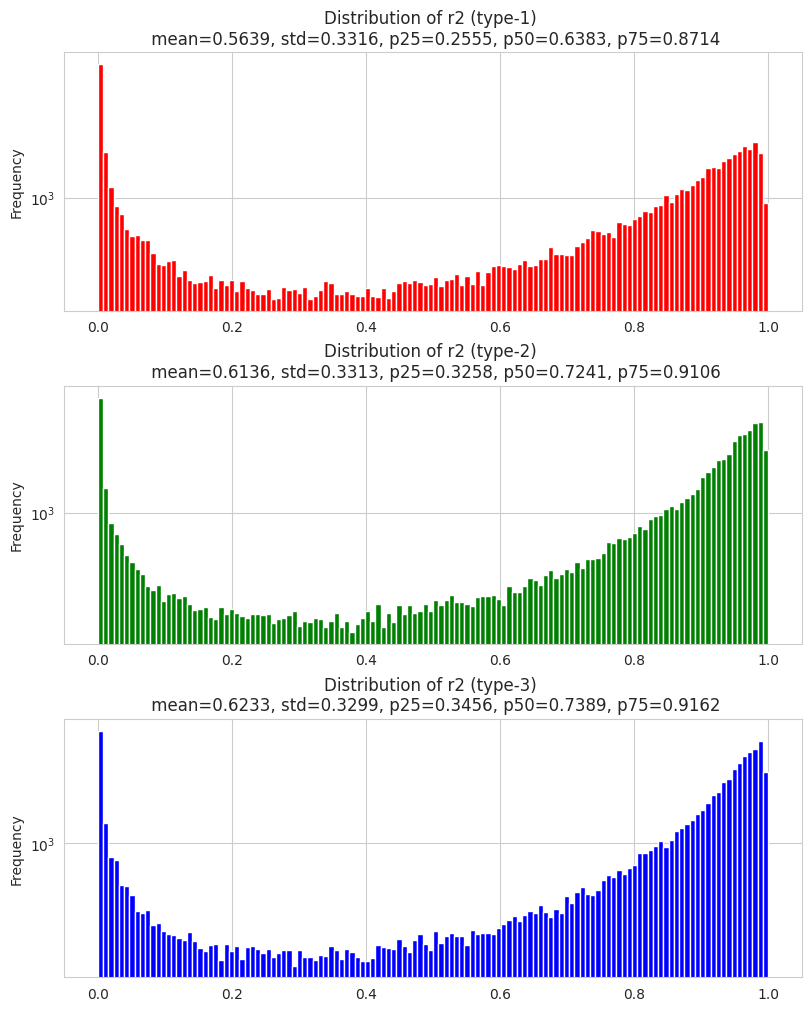

In [5]:
hist(result, 'r2')

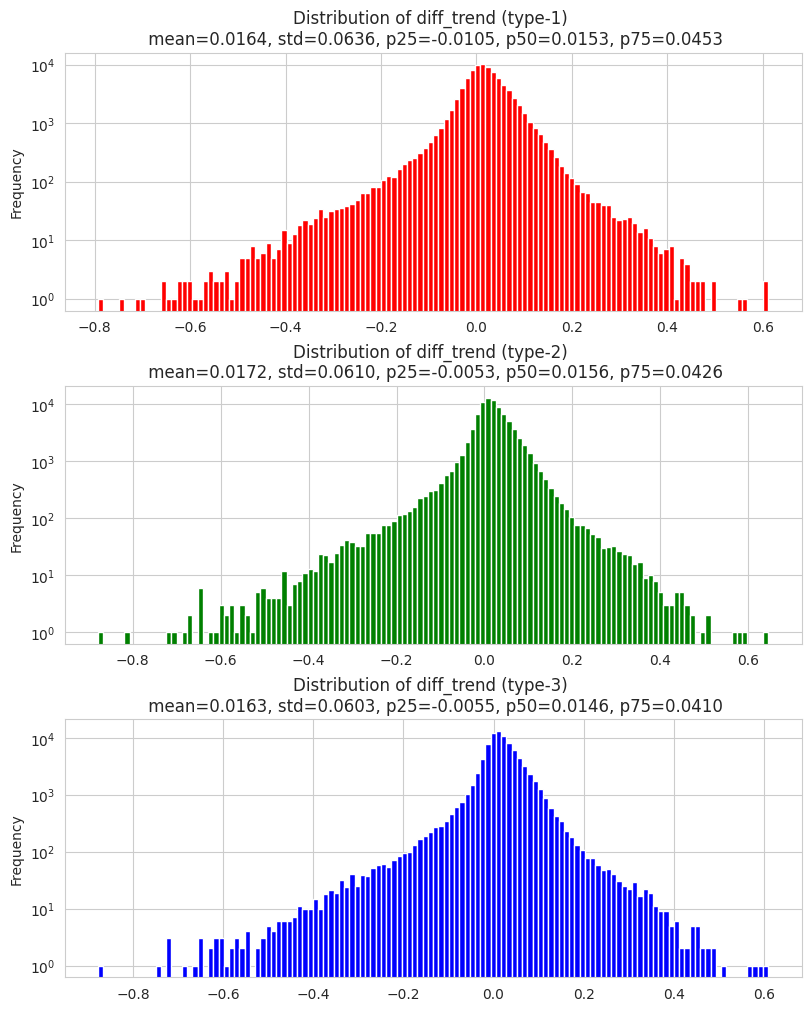

In [6]:
hist(result, 'diff_trend')

# 5 random polygons (type-3)

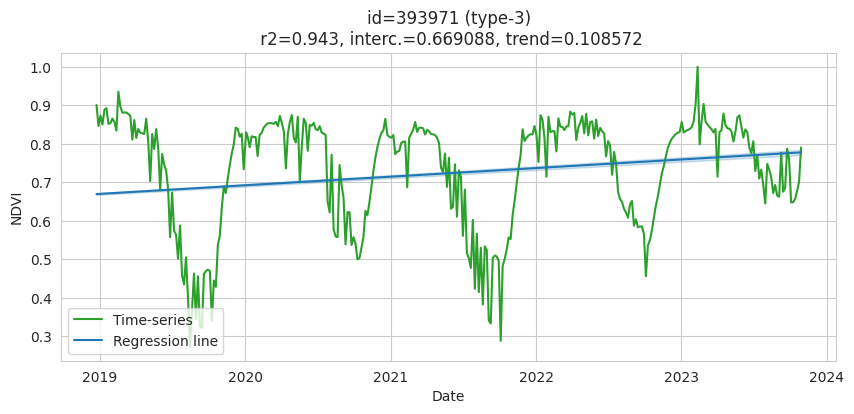

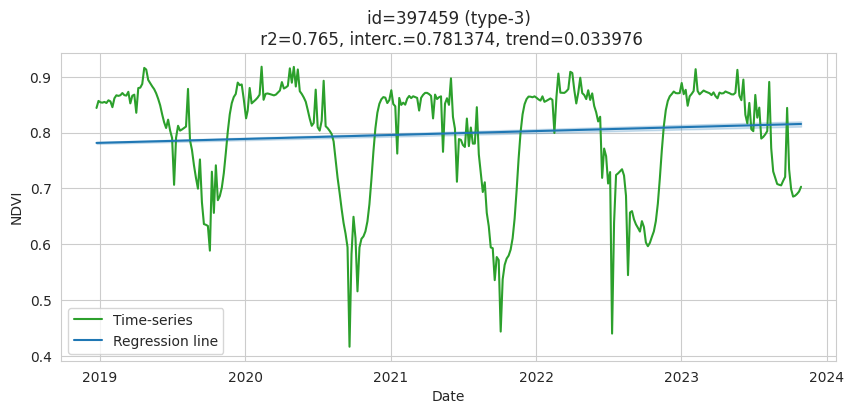

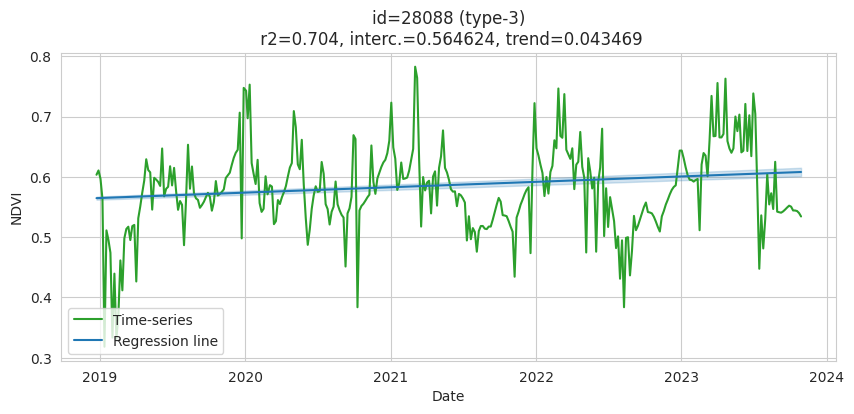

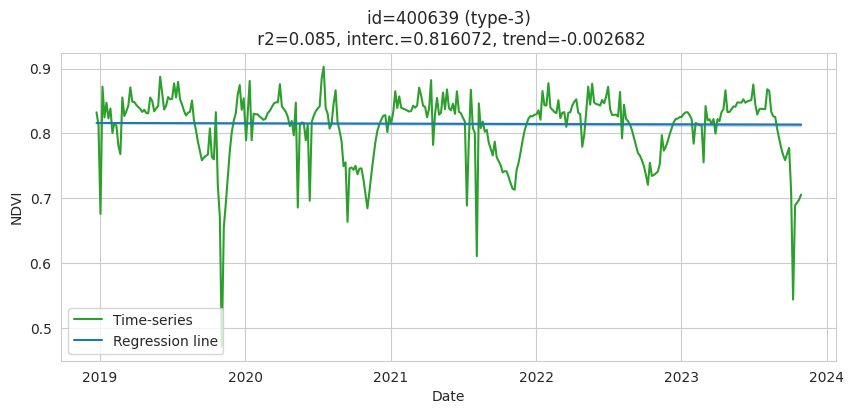

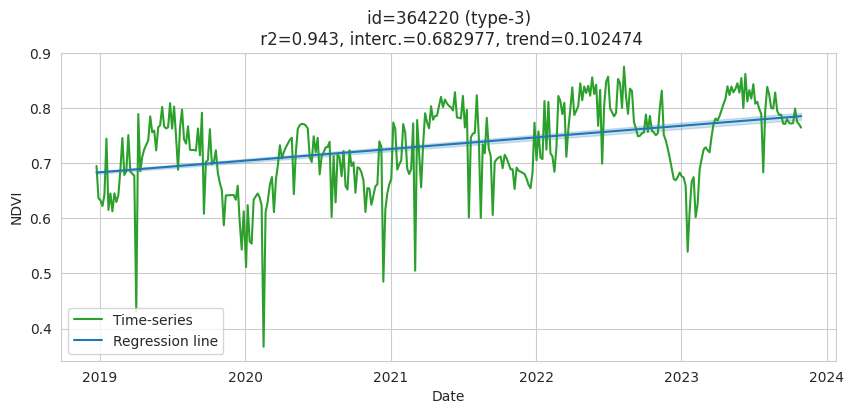

In [8]:
samp = result.sample(5)
stype = 3
for id_pol in list(samp['id_pol']):
    plot_ts(result, id_pol, stype)

# Top-5 positive polygons (type-3)

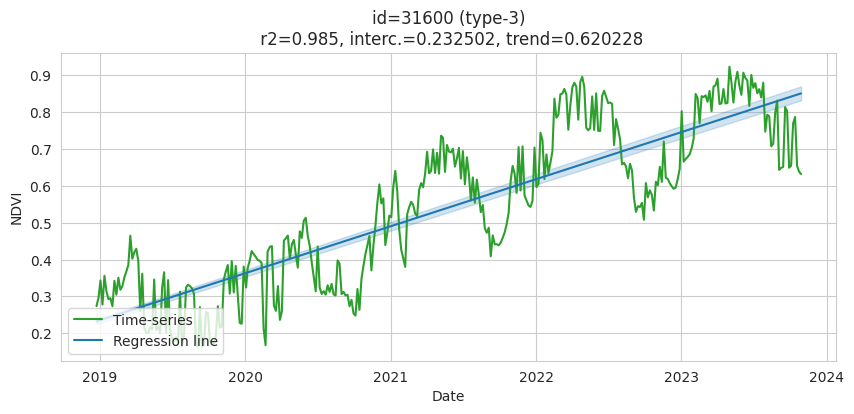

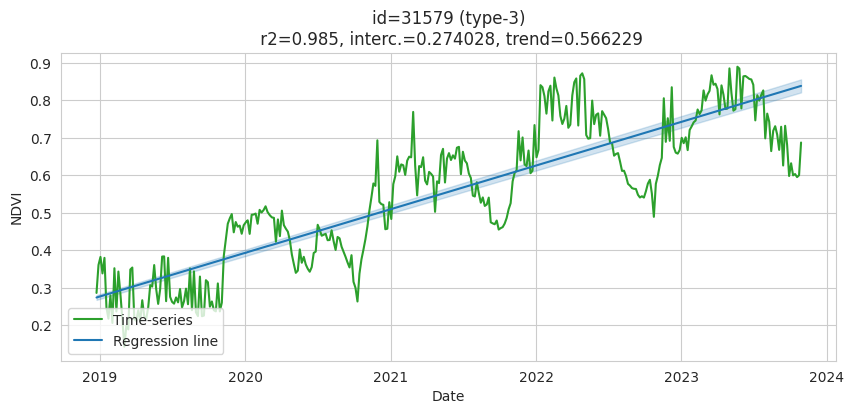

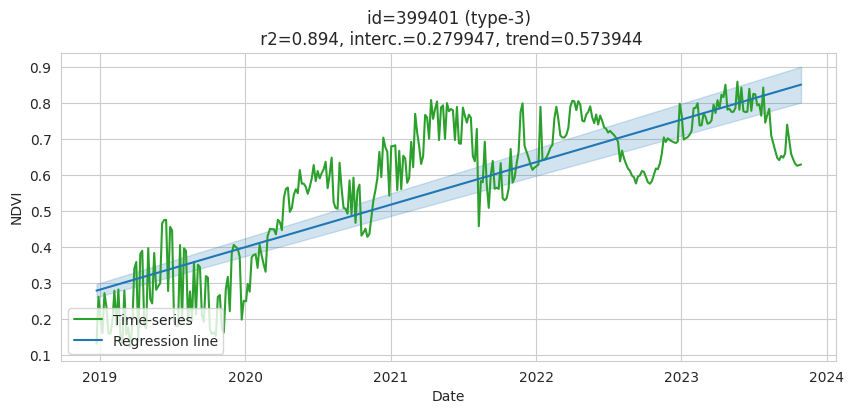

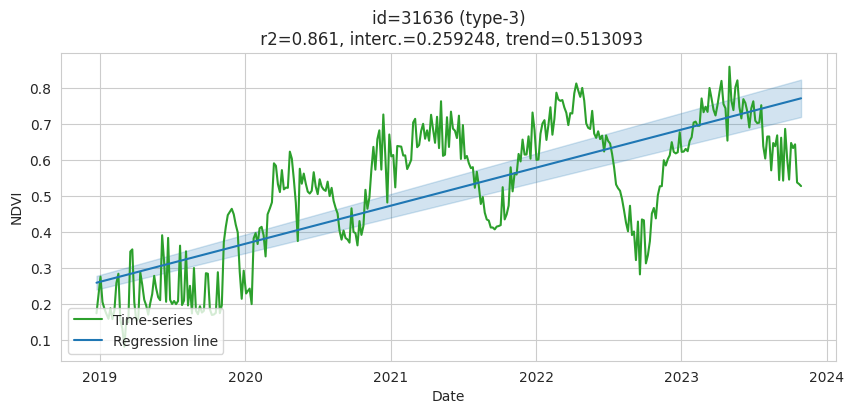

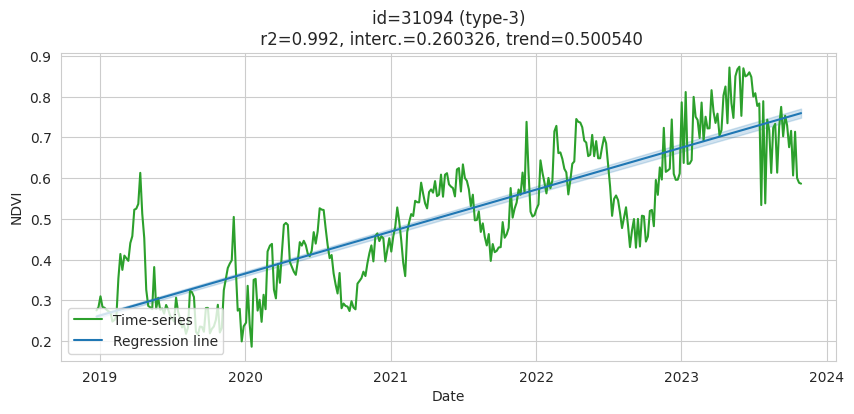

In [9]:
top5_neg = result[
    np.logical_and.reduce([
        result['type'] == 1.0, 
        result['trend_signif'] == True,
        result['trend_m'] > 0.1
    ])][['trend_m','id_pol']] \
    .sort_values('trend_m', ascending=False) \
    .head(5)

stype = 3
for id_pol in list(top5_neg['id_pol']):
    plot_ts(result, id_pol, stype)

# Top-5 negative polygons (type-3)

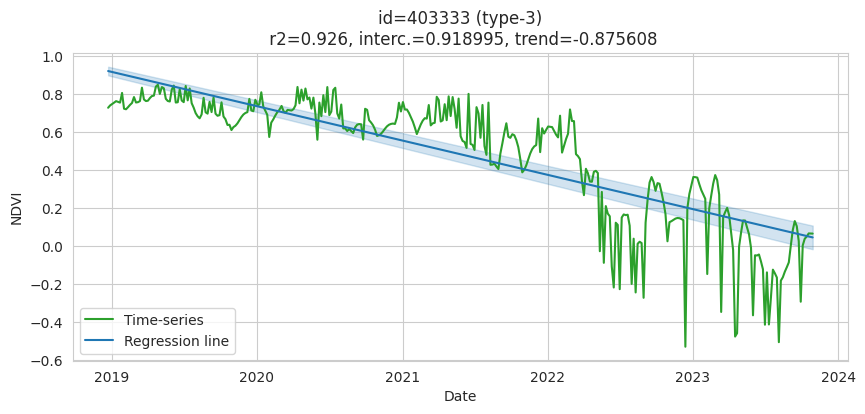

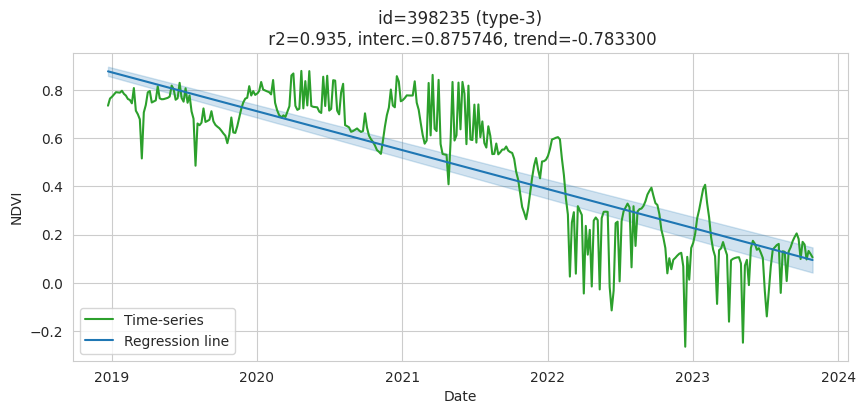

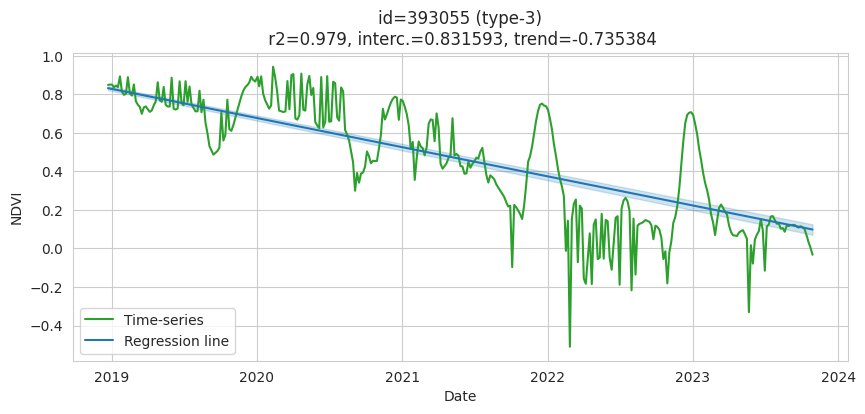

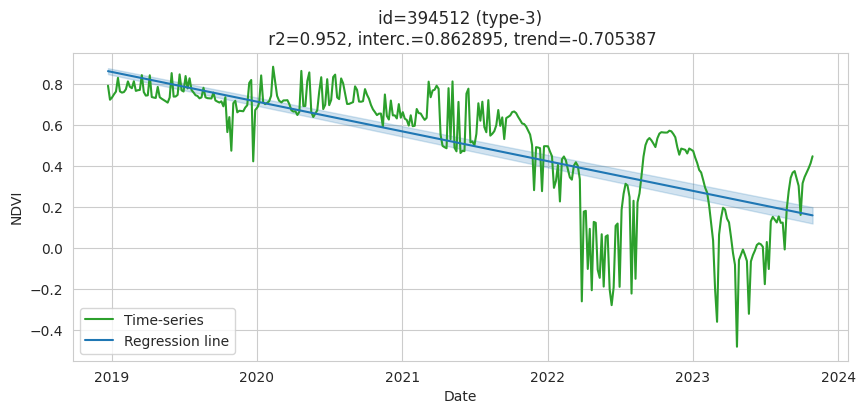

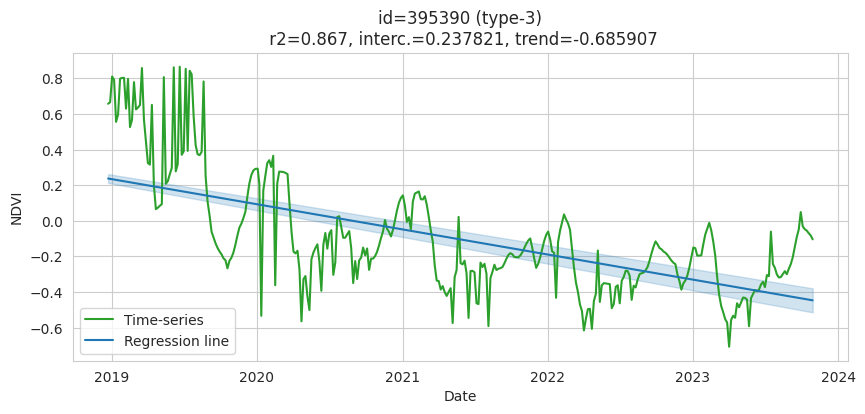

In [10]:
top5_pos = result[
    np.logical_and.reduce([
        result['type'] == 1.0, 
        result['trend_signif'] == True,
        result['trend_m'] < 0.1
    ])][['trend_m','id_pol']] \
    .sort_values('trend_m', ascending=True) \
    .head(5)

stype = 3
for id_pol in list(top5_pos['id_pol']):
    plot_ts(result, id_pol, stype)